In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
concatenate_dfs = [] 

In [17]:
backgrounds = ['at dusk', 'at night', 'base', 'in bright sunlight', 'in the fog', 'in the forest', 'in the rain', 'in the snow', 'studio lighting']
for bg in backgrounds:
    bg_file = '_'.join(bg.split())
    df = pd.read_csv(f'./cache/{bg_file}_preds.csv')
    temp_df = pd.DataFrame({'cnf':df['cnf'],'bg':bg})
    concatenate_dfs.append(temp_df)

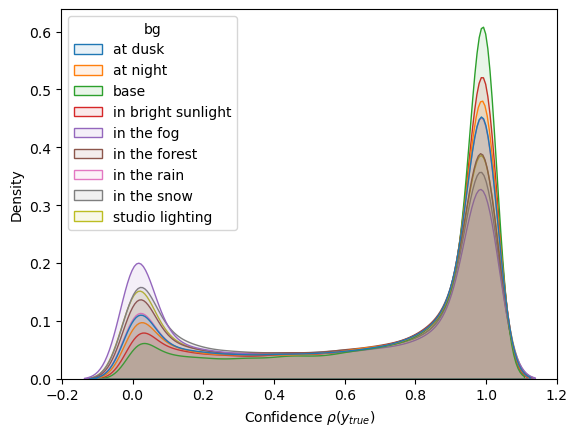

In [26]:
main_df = pd.concat(concatenate_dfs, ignore_index=True)
ax = sns.kdeplot(data=main_df, x='cnf', hue='bg', alpha = 0.1, fill = True)
sns.move_legend(ax, 'upper left')
ax.set(xlabel = 'Confidence '+r'$\rho(y_{true})$')
plt.show()

bg
at dusk               0.126906
at night              0.120629
base                  0.096475
in bright sunlight    0.110349
in the fog            0.159733
in the forest         0.137705
in the rain           0.128331
in the snow           0.146986
studio lighting       0.145604
Name: cnf, dtype: float64


/tmp/ipykernel_1433296/1955890272.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


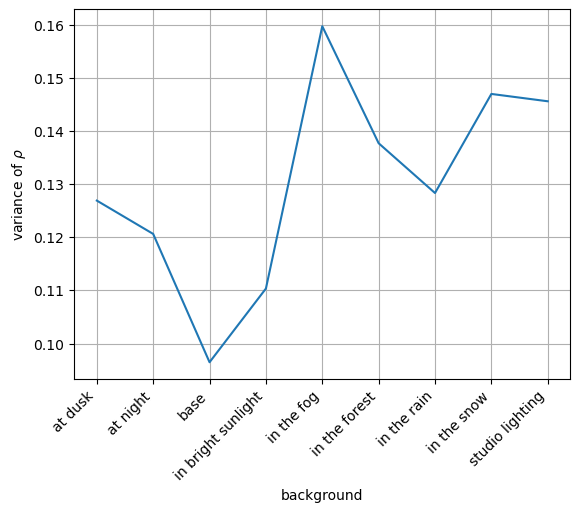

In [36]:
variances_df = main_df.groupby('bg')['cnf'].var()
print(variances_df)
ax = sns.lineplot(data=variances_df)
ax.set(ylabel = 'variance of '+r'$\rho$', xlabel='background')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid()
plt.show()